In [53]:
import graphviz as gv

In [54]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [55]:
## sklearn 모듈의 tree import
from sklearn import tree

# tree 시각화
import graphviz as gv
from sklearn.tree import export_graphviz
import os

# 환경변수 추가 후 환경변수 설정 아래 코드
os.environ["PATH"]+= os.pathsep + 'C:/Program Files/Graphviz/bin'

In [56]:
## 테스트 데이터 생성
# 성별 남 : 0, 여 : 1
my_list1 = [
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1' ]
# 나이 
my_list2 = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
            50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
            50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
# 타겟 데이터, good/bad : good(0),bad(1)    
my_list3 = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1' ]
      
df_tree_t = pd.DataFrame({'성별': my_list1, 
                          '나이': my_list2, 
                          'good/bad': my_list3})

In [57]:
# 데이터 확인
print(df_tree_t.shape)
print(df_tree_t.info())
df_tree_t.head(3)

(100, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   성별        100 non-null    object
 1   나이        100 non-null    int64 
 2   good/bad  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
None


,성별,나이,good/bad
0,0,50,0
1,0,50,0
2,0,50,0


In [58]:
# 지니지수 -- 나이기준
# 데이터 컨버전

train_temp_X = np.array(df_tree_t['나이'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

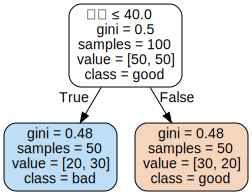

In [59]:
# 지니지수의 의사결정트리 모델 피팅
gini_clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3, 
                                       random_state= 20 )
gini_clf = gini_clf.fit(train_temp_X, train_temp_y)

# 시각화
dot_data = tree.export_graphviz(gini_clf, # 의사결정나무 모델 대입
                               out_file = None, #file 로 변환할 것인가
                               feature_names = ['나이'], #feature이름
                                class_names  = ['good', 'bad'], #target 이름                               
                                filled = True, # 그림에 색상을 넣을 것인가)
                                rounded = True,     # 반올림 할 것인가
                                special_characters = True)  # 특수문자를 사용할 것인가
graph = gv.Source(dot_data)
graph
                            

In [60]:
# 지니지수 -- 성별기준
train_temp_X = np.array(df_tree_t['성별'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

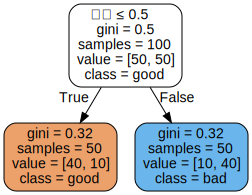

In [61]:
# 지니지수의 의사결정트리 모델 피팅
gini_clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3, 
                                       random_state= 20 )
gini_clf = gini_clf.fit(train_temp_X, train_temp_y)

# 시각화
dot_data = tree.export_graphviz(gini_clf, # 의사결정나무 모델 대입
                               out_file = None, #file 로 변환할 것인가
                               feature_names = ['성별'], #feature이름
                                class_names  = ['good', 'bad'], #target 이름                               
                                filled = True, # 그림에 색상을 넣을 것인가)
                                rounded = True,     # 반올림 할 것인가
                                special_characters = True)  # 특수문자를 사용할 것인가
graph = gv.Source(dot_data)
graph

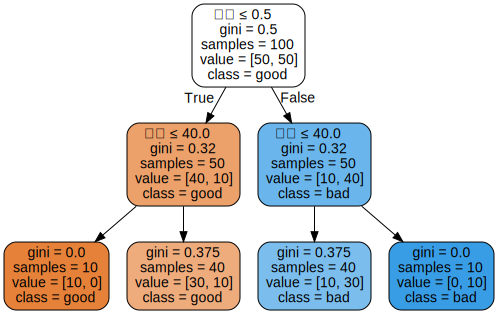

In [62]:
# 지니지수 -- 분할 기준 확인
train_temp_X = np.array(df_tree_t[['나이','성별']])
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 지니지수의 의사결정트리 모델 피팅
gini_clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3, 
                                       random_state= 20 )
gini_clf = gini_clf.fit(train_temp_X, train_temp_y)

# 시각화
dot_data = tree.export_graphviz(gini_clf, # 의사결정나무 모델 대입
                               out_file = None, #file 로 변환할 것인가
                               feature_names = ['나이','성별'], #feature이름
                                class_names  = ['good', 'bad'], #target 이름                               
                                filled = True, # 그림에 색상을 넣을 것인가)
                                rounded = True,     # 반올림 할 것인가
                                special_characters = True)  # 특수문자를 사용할 것인가
graph = gv.Source(dot_data)
graph

In [11]:
# Fitting 된 모델로 x_valid 를 통해 예측을 진행
y_pred_gini = gini_clf.predict(train_temp_X)

y_pred_e = gini_clf.predict(train_temp_X)
print('Accuracy : %.2f'%accuracy_score(train_temp_y, y_pred_e))

print(confusion_matrix(train_temp_y,y_pred_e))

# 속성 중요도 확인
feature_importance = pd.DataFrame(gini_clf.feature_importances_.reshape((1,-1)),
                              columns = [['나이','성별']],index = ['feature_importance'])
feature_importance

Accuracy : 0.80
[[40 10]
 [10 40]]


,나이,성별
feature_importance,0.1,0.9


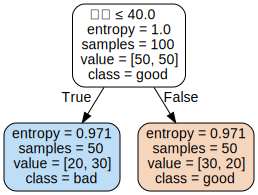

In [68]:
# 엔트로피 -- 나이기준
train_temp_X = np.array(df_tree_t['나이'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 엔트로피의 의사결정트리 모델 피팅
entropy_clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3, 
                                       random_state= 20 )
entropy_clf = entropy_clf.fit(train_temp_X, train_temp_y)

# 시각화
dot_data = tree.export_graphviz(entropy_clf, # 의사결정나무 모델 대입
                               out_file = None, #file 로 변환할 것인가
                               feature_names = ['나이'], #feature이름
                                class_names  = ['good', 'bad'], #target 이름                               
                                filled = True, # 그림에 색상을 넣을 것인가)
                                rounded = True,     # 반올림 할 것인가
                                special_characters = True)  # 특수문자를 사용할 것인가
graph = gv.Source(dot_data)
graph

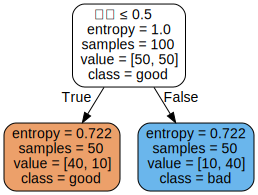

In [69]:
# 엔트로피 -- 성별기준
train_temp_X = np.array(df_tree_t['성별'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 지니지수의 의사결정트리 모델 피팅
entropy_clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3, 
                                       random_state= 20 )
entropy_clf = entropy_clf.fit(train_temp_X, train_temp_y)

# 시각화
dot_data = tree.export_graphviz(entropy_clf, # 의사결정나무 모델 대입
                               out_file = None, #file 로 변환할 것인가
                               feature_names = ['성별'], #feature이름
                                class_names  = ['good', 'bad'], #target 이름                               
                                filled = True, # 그림에 색상을 넣을 것인가)
                                rounded = True,     # 반올림 할 것인가
                                special_characters = True)  # 특수문자를 사용할 것인가
graph = gv.Source(dot_data)
graph

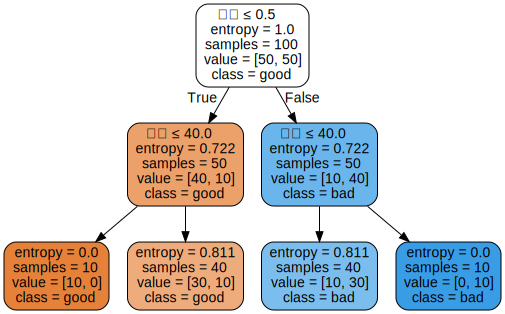

In [70]:
# 엔트로피-- 분할 기준 확인
train_temp_X = np.array(df_tree_t[['나이','성별']])
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 엔트로피의 의사결정트리 모델 피팅
entropy_clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3, 
                                       random_state= 20 )
entropy_clf = entropy_clf.fit(train_temp_X, train_temp_y)

# 시각화
dot_data = tree.export_graphviz(entropy_clf, # 의사결정나무 모델 대입
                               out_file = None, #file 로 변환할 것인가
                               feature_names = ['나이','성별'], #feature이름
                                class_names  = ['good', 'bad'], #target 이름                               
                                filled = True, # 그림에 색상을 넣을 것인가)
                                rounded = True,     # 반올림 할 것인가
                                special_characters = True)  # 특수문자를 사용할 것인가
graph = gv.Source(dot_data)
graph

In [71]:
from sklearn.metrics import accuracy_score

y_pred_e = entropy_clf.predict(train_temp_X)
print('Accuracy : %.2f' % accuracy_score(train_temp_y, y_pred_e))

from sklearn.metrics import confusion_matrix
confusion_matrix(train_temp_y,y_pred_e)

## 트리 분기 과정의 중요도 확인
input_impor = entropy_clf.feature_importances_.reshape((1,-1))

feature_importance = pd.DataFrame(input_impor, columns = [['나이','성별']], 
                                 index = ['feature_importance'])
feature_importance

Accuracy : 0.80


,나이,성별
feature_importance,0.207722,0.792278


# load_breast_cancer 데이터 활용한 Tree Model

In [72]:
from sklearn.datasets import load_breast_cancer

In [73]:
# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data['data']

# 종양 : 양성(0), 악성(1) 여부 (target data)
b_target_data = data['target']

# 종양 구분
tumar = data['target_names']

# 속성 명칭
feature_names = data['feature_names']

breast_df = pd.DataFrame(b_input_data, columns = feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 '_' 달기
breast_df.columns = [col.replace(" ","_") for col in breast_df.columns]

# label 데이터 비율 확인
breast_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [74]:
breast_df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [75]:
## 학습 데이터셋 생성

# 평균 관련된 3개의 속성으로 종양 여부 판단
model_feature_name = ['mean_radius', 'mean_texture','mean_perimeter']
X = breast_df[model_feature_name]

Y = breast_df['target']

# 80% 의 데이터를 학습 데이터로, 20% 를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size  = 0.2, random_state = 30)

In [76]:
## 스케일링 & 정규화

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [77]:
## 지니계수 의사결정나무 분류

from sklearn.tree import DecisionTreeClassifier

breast_clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 30 )
breast_clf_gini = breast_clf_gini.fit(X_train_std, y_train) # featrue,target

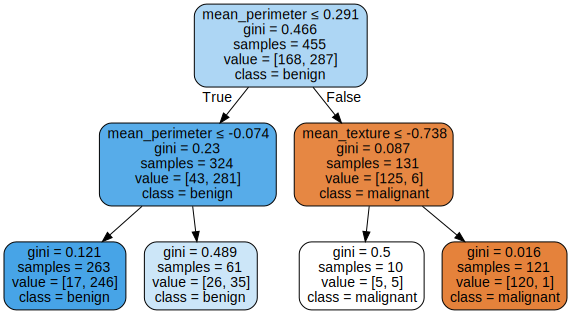

In [78]:
## 지니계수 의사결정나무 분류 시각화
import graphviz as gv
dot_data = tree.export_graphviz(breast_clf_gini, # 의사결정나무 모델 대입
                               out_file = None, # file로 변환시킬 것인가
                               feature_names = model_feature_name, # feature 이름
                               class_names = tumar, # target 이름
                               filled = True, # 그림에 색상을 넣을 것인가
                               rounded = True, # 반올림 할건가
                               special_characters = True)   # 특수문자를 사용하는가 
graph = gv.Source(dot_data)
graph
     
                            

In [79]:
## 모델 성능 확인
from sklearn.metrics import accuracy_score
y_pred_gini = breast_clf_gini.predict(X_test_std)
print("Accuracy : %.2f" % accuracy_score (y_test, y_pred_gini))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gini)

Accuracy : 0.89


array([[34, 10],
       [ 2, 68]], dtype=int64)

In [80]:
## 트리 분기 과정의 중요도
input_impor_gini = breast_clf_gini.feature_importances_.reshape((1,-1))

feature_importance = pd.DataFrame(input_impor_gini, columns = model_feature_name,
    index = ['feature_importance'])
feature_importance


,mean_radius,mean_texture,mean_perimeter
feature_importance,0.0,0.031168,0.968832


In [81]:
## 엔트로피 의사결정나무 분류

from sklearn.tree import DecisionTreeClassifier

breast_clf_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 30 )
breast_clf_entropy = breast_clf_entropy.fit(X_train_std, y_train) # featrue,target

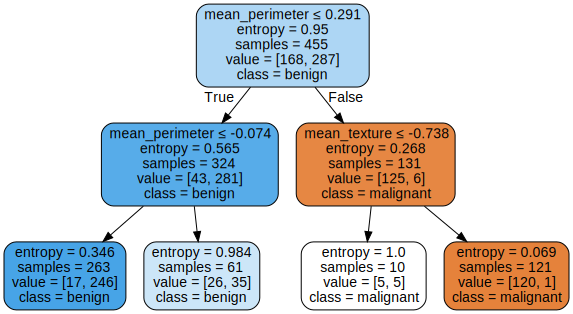

In [82]:
## 지니계수 의사결정나무 분류 시각화
import graphviz as gv
dot_data2 = tree.export_graphviz(breast_clf_entropy, # 의사결정나무 모델 대입
                               out_file = None, # file로 변환시킬 것인가
                               feature_names = model_feature_name, # feature 이름
                               class_names = tumar, # target 이름
                               filled = True, # 그림에 색상을 넣을 것인가
                               rounded = True, # 반올림 할건가
                               special_characters = True)   # 특수문자를 사용하는가 
graph2 = gv.Source(dot_data2)
graph2
     
              

In [83]:
## 모델 성능 확인
from sklearn.metrics import accuracy_score
y_pred_cross = breast_clf_entropy.predict(X_test_std)
print("Accuracy : %.2f" % accuracy_score (y_test, y_pred_cross))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cross)

Accuracy : 0.89


array([[34, 10],
       [ 2, 68]], dtype=int64)

# Boston Housing Price 데이터를 이용한 의사결정나무 실습

In [90]:
from sklearn.datasets import load_boston

# Boston Housing Price (보스턴 주택 가격 데이터)
data_b = load_boston()
df_b = pd.DataFrame(data_b.data, columns=data_b.feature_names)
 

# medv target data 
df_b['MEDV'] = data_b.target
print(df_b.shape)
df_b.head(3)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [91]:
# 데이터 분할
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_b.data,
                                                           data_b.target,
                                                           test_size = 0.2,
                                                           random_state = 30)

In [92]:
## 의사결정 회귀 모델 학습 
from sklearn.tree import DecisionTreeRegressor

D_regressor = DecisionTreeRegressor()
D_regressor = D_regressor.fit(X_train_b, y_train_b)

client = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

pred_house_price = D_regressor.predict(client)[0]

print("예측 결과: {0:.2f}".format(pred_house_price), "(No Feature Selection)")

예측 결과: 15.00 (No Feature Selection)


In [93]:
# 테스트셋 예측 
y_pred_d_r = D_regressor.predict(X_test_b)

# MSE, r2_score 
from sklearn.metrics import mean_squared_error, r2_score 
mse_r = mean_squared_error(y_test_b, y_pred_d_r)
print("MSE :", mse_r)

# RMSE
rmse = np.sqrt(mse_r)
print("RMSE:", rmse)

# 결졍 계수(score) 
print("R^2 score:", D_regressor.score(X_test_b, y_test_b))

r2_points = r2_score(y_test_b, y_pred_d_r)
print("R^2 score 계산:", r2_points)

MSE : 12.61
RMSE: 3.5510561809129406
R^2 score: 0.8017882479381175
R^2 score 계산: 0.8017882479381175


In [94]:
## 트리 분기 과정의 중요도 
input_impor_D_all = D_regressor.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor_D_all, columns=data_b.feature_names, index=['feature_importance'])
feature_importance

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
feature_importance,0.03479,0.001175,0.006926,0.000081,0.029821,0.573465,0.00837,0.086791,0.000377,0.011421,0.020262,0.006627,0.219896


In [95]:
## 3개 속성 적용 

model_f_name_r = ['RM', 'LSTAT', 'PTRATIO']

data_etc = df_b[model_f_name_r]
from sklearn.preprocessing import StandardScaler
## 스케일링 & 정규화
scaler = StandardScaler()
data_sclar =scaler.fit_transform(data_etc)

X_train_b_e, X_test_b_e, y_train_b_e, y_test_b_e = train_test_split(data_sclar, 
                                                                    data_b.target, 
                                                                    test_size=0.2, 
                                                                    random_state=30)

In [ ]:
# target 은 MEDV 그대로이다. 

In [96]:
# 모델 학습 
D_e_regressor = DecisionTreeRegressor(max_depth=3)
D_e_regressor = D_e_regressor.fit(X_train_b_e, y_train_b_e)

# 특정 값으로 예측 값 확인 
client = [[5.6090, 12.13, 20.20]]

pred_house_price = D_e_regressor.predict(client)[0]

print("Predicted value of client's home: {0:.2f}".format(pred_house_price), "(No Feature Selection)")

Predicted value of client's home: 21.90 (No Feature Selection)


In [97]:
# 테스트셋 예측 
y_pred_d_r_b_e = D_e_regressor.predict(X_test_b_e)

# MSE, r2_score 
from sklearn.metrics import mean_squared_error, r2_score 
mse_r = mean_squared_error(y_test_b_e, y_pred_d_r_b_e)
print("MSE:", mse_r)

# RMSE
rmse = np.sqrt(mse_r)
print("RMSE:", rmse)

# 결졍 계수(score) 
print("R^2:", D_e_regressor.score(X_test_b_e, y_test_b_e))

r2_points = r2_score(y_test_b_e, y_pred_d_r_b_e)
print("R^2 계산:", r2_points)

MSE: 13.788127575303587
RMSE: 3.7132368057132563
R^2: 0.7832697125809929
R^2 계산: 0.7832697125809929


In [98]:
## 트리 분기 과정의 중요도 
input_impor_D_all = D_e_regressor.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor_D_all, 
                                  columns=model_f_name_r, 
                                  index=['feature_importance'])
feature_importance

,RM,LSTAT,PTRATIO
feature_importance,0.682206,0.317794,0.0


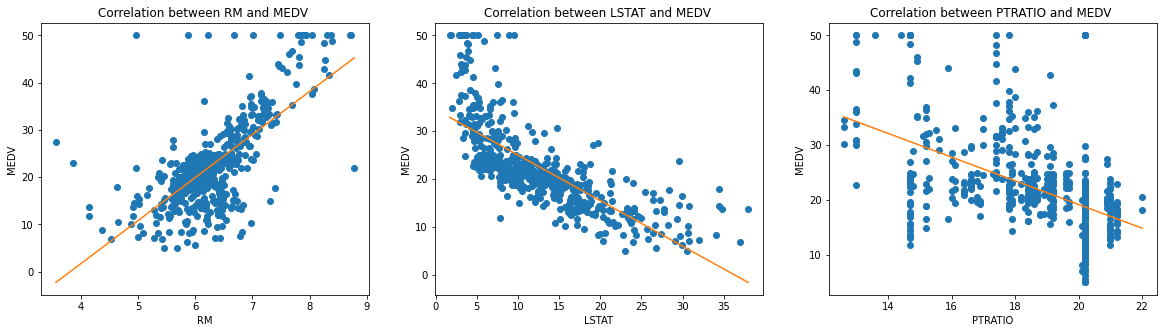

In [113]:
plt.figure(figsize=(20, 5))
medv = data_b.target
data = df_b[['RM', 'LSTAT', 'PTRATIO']]

for i, col in enumerate(data.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = medv
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title('Correlation between '+ col + ' and MEDV ')
    plt.xlabel(col)
    plt.ylabel('MEDV')

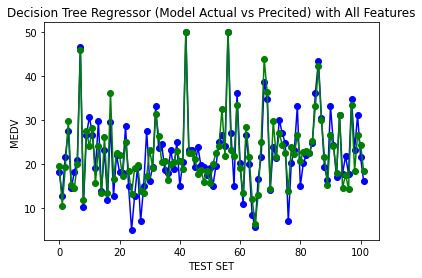

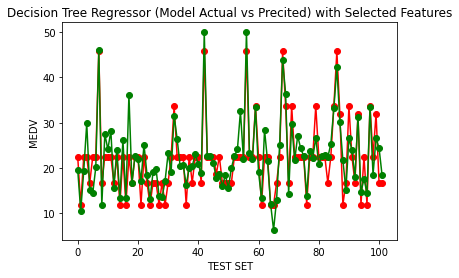

In [99]:
## 전체 속성 사용과 3개 속성 사용 잔차 비교 시각화 

## 전체 속성 사용 
y_pred_d_r = D_regressor.predict(X_test_b)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with All Features")
plt.xlabel('TEST SET')
plt.ylabel('MEDV')
plt.plot(y_pred_d_r, 'o-', color="b", label="Predicted MEDV")
plt.plot(y_test_b, 'o-', color="g", label="Actual MEDV")

## 3개 속성 사용 
y_pred_f_e = D_e_regressor.predict(X_test_b_e)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with Selected Features")
plt.xlabel('TEST SET')
plt.ylabel('MEDV')
plt.plot(y_pred_f_e, 'o-', color="r", label="Predicted MEDV")
plt.plot(y_test_b_e, 'o-', color="g", label="Actual MEDV")

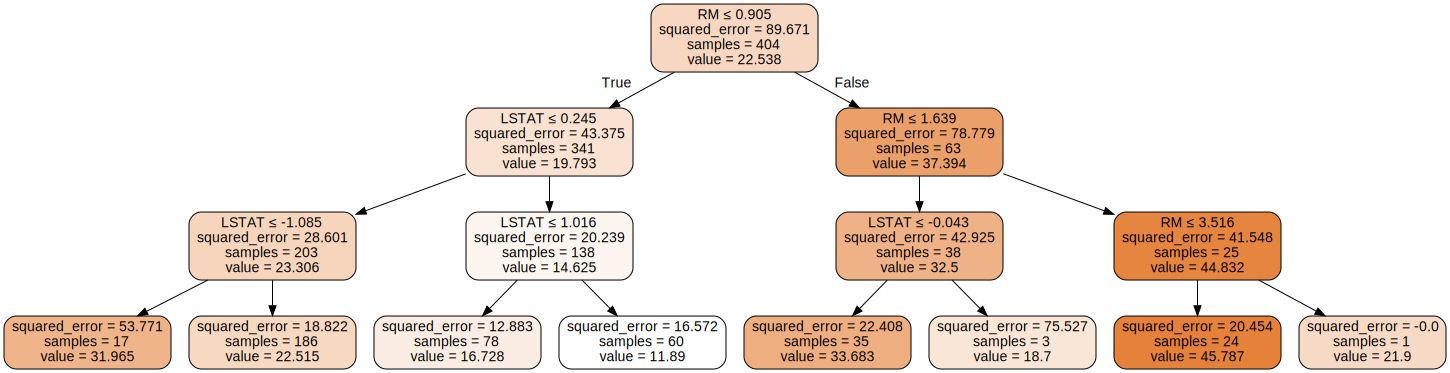

In [102]:
# 의사결정 나무 회귀, 3개 속성 시각화
dot_data3 = tree.export_graphviz(D_e_regressor,        # 의사결정나무 모형 대입
                               out_file = None,     # file로 변환할 것인가
                               feature_names = model_f_name_r, # feature 이름
                               filled = True,        # 그림에 색상을 넣을것인가
                               rounded = True,       # 반올림을 진행할 것인가
                               special_characters = True)    # 특수문자를 사용하나

graph3 = gv.Source(dot_data3)              
graph3

## 이미지로 저장 
# gv.Source(dot_data3).render('의사결정나무 회귀', format="png")

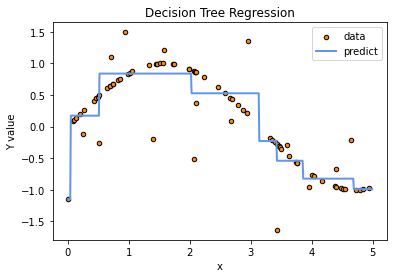

In [114]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="predict")
plt.xlabel("x")
plt.ylabel("Y value")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 추가

In [ ]:
## 2개 속성 적용 

model_f_name_r = ['RM', 'LSTAT']

data_etc = df_b[model_f_name_r]
from sklearn.preprocessing import StandardScaler

## 스케일링 & 정규화
scaler = StandardScaler()
data_sclar =scaler.fit_transform(data_etc)

X_train_b_e, X_test_b_e, y_train_b_e, y_test_b_e = train_test_split(data_sclar, 
                                                                    data_b.target, 
                                                                    test_size=0.2, 
                                                                    random_state=30)

In [116]:
# 모델 학습 
D_e_regressor = DecisionTreeRegressor(max_depth=3)
D_e_regressor = D_e_regressor.fit(X_train_b_e, y_train_b_e)

In [119]:
# 테스트셋 예측 
y_pred_d_r_b_e = D_e_regressor.predict(X_test_b_e)

# MSE, r2_score 
from sklearn.metrics import mean_squared_error, r2_score 
mse_r = mean_squared_error(y_test_b_e, y_pred_d_r_b_e)
print("MSE:", mse_r)

# RMSE
rmse = np.sqrt(mse_r)
print("RMSE:", rmse)

# 결졍 계수(score) 
print("R^2:", D_e_regressor.score(X_test_b_e, y_test_b_e))

r2_points = r2_score(y_test_b_e, y_pred_d_r_b_e)
print("R^2 계산:", r2_points)

MSE: 13.788127575303598
RMSE: 3.7132368057132576
R^2: 0.7832697125809928
R^2 계산: 0.7832697125809928


In [118]:
## 트리 분기 과정의 중요도 
input_impor_D_all = D_e_regressor.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor_D_all, 
                                  columns=model_f_name_r, 
                                  index=['feature_importance'])
feature_importance

,RM,LSTAT
feature_importance,0.682206,0.317794
